<a href="https://colab.research.google.com/github/Otgonbtr/Dive_into_code/blob/main/2D_arrays_and_gradient_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
####### Problem 1 #########
# Linear function

import numpy as np
x = np.arange(-50,50,0.1)
y = (1/2)*x+1
#print(x)
print('x shape is {}'.format(x.shape))
print('y shape is {}'.format(y.shape))


x shape is (1000,)
y shape is (1000,)


In [70]:
######### Problem 2 #########
#array combination.

a = np.stack((x,y), axis=1)
print('x and y array is combined with {} shape.'.format(a.shape))

x and y array is combined with (1000, 2) shape.


In [71]:
########## Problem 3 ##########
#find the gradient

x_change = x[1:] - x[:-1]
y_change = y[1:] - y[:-1]
print('x gradient is {}'.format(x_change[0]))
print('y gradient is {}'.format(y_change[0]))
gradient = y_change/x_change
print('gradient=y_gradient/x_gradient {}'.format(gradient[0]))

x gradient is 0.10000000000000142
y gradient is 0.05000000000000071
gradient=y_gradient/x_gradient 0.5


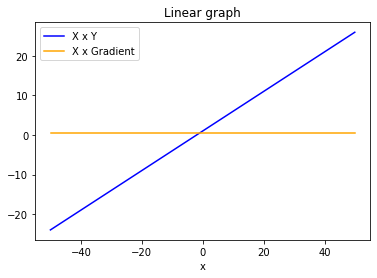

In [72]:
####### Problem 4 #########
#draw a graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y, color='b', label = 'X x Y')
ax.plot(x[1:], gradient, color='orange', label ='X x Gradient')
plt.title("Linear graph")
plt.xlabel("x")
plt.legend()
plt.show()

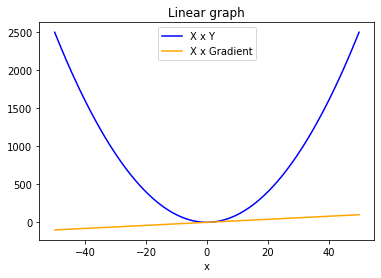

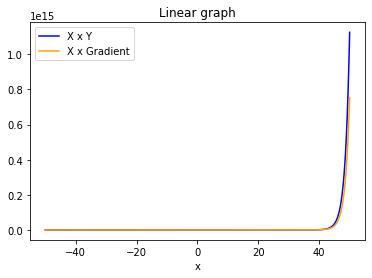

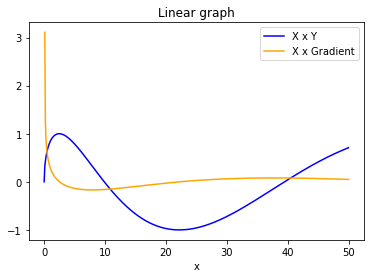

In [73]:
import array
####### Problem 5 #######
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    x_range = np.arange(*x_range)
    array_xy = np.stack((x_range,function),axis=1)
    x_change = x_range[1:] - x_range[:-1]
    y_change = function[1:] - function[:-1]
    gradient = y_change/x_change
    return array_xy, gradient

def function1(array_x):
    array_x = np.arange(*array_x)
    array_y = array_x**2
    return array_y
def function2(array_x):
    array_x = np.arange(*array_x)
    array_y = 2*(array_x)**2+2**array_x
    return array_y
def function3(array_x):
    array_x = np.arange(*array_x)
    array_y = np.sin(np.sqrt(array_x))
    return array_y

def draw_plot(x,y):
  fig,ax = plt.subplots()
  ax.plot(x[:,0], x[:,1], color='b', label = 'X x Y')
  ax.plot(x[1:,0], y, color='orange', label ='X x Gradient')
  plt.title("Linear graph")
  plt.xlabel("x")
  plt.legend()
  plt.show()


array_x = (-50,50.1,0.1)
array_xy1, gradient1 = compute_gradient(function1(array_x))
draw_plot(array_xy1,gradient1)


array_xy2, gradient2 = compute_gradient(function2(array_x))
draw_plot(array_xy2,gradient2)


array_x3 = (0,50.1,0.1)
array_xy3, gradient3 = compute_gradient(function3(array_x3),array_x3)
draw_plot(array_xy3,gradient3)

minimum value of function1 5.048709793414476e-25, index: 500
minimum value of function2 0.9505505632959851, index: 498
minimum value of function3 -0.9999997540298113, index: 222


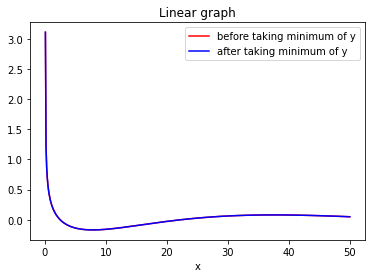

In [74]:
####### Problem 6 #######
# find the minumum value

min1 = array_xy1[:,1].min()
argmin1 = array_xy1[:,1].argmin()
print('minimum value of function1 {}, index: {}'.format(min1,argmin1))

min2 = array_xy2[:,1].min()
argmin2 = array_xy2[:,1].argmin()
print('minimum value of function2 {}, index: {}'.format(min2,argmin2))

min3 = array_xy3[:,1].min()
argmin3 = array_xy3[:,1].argmin()
print('minimum value of function3 {}, index: {}'.format(min3,argmin3))


x_range = np.arange(*array_x3)
x_range = np.delete(x_range, argmin3)
y = np.delete(function3(array_x3),argmin3)
y_change = y[1:]-y[:-1]
x_change = x_range[1:]-x_range[:-1]
gradient = y_change/x_change

fig, ax = plt.subplots()
ax.plot(x_range[1:], gradient, color='red', label = 'before taking minimum of y')
ax.plot(array_xy3[1:,0], gradient3, color='b', label ='after taking minimum of y')
plt.title("Linear graph")
plt.xlabel("x")
plt.legend()
plt.show()